# Fund Analysis for Japanese mutual trust

This notebook is a memo for fund analysis for some Japanese mutual trust managed by independent fund managers

The data comes from https://www.morningstar.co.jp/

## Import packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
plt.style.use('seaborn-darkgrid')

## Return analysis

### Data

In [2]:
returns = pd.read_excel('fund_return.xlsx')

In [3]:
returns.tail()

,date,sezon_global,sezon_tatsujin,yui_2101,hifumi_plus,sawakami,commons30,commons2020
141,201901,0.023205,0.058786,1.901375e-02,0.065528,0.041159,0.060866,0.109509
142,201902,0.040907,0.066312,2.729639e-02,0.047901,0.017504,0.010328,0.053693
143,201903,0.006274,-0.008076,1.000000e-08,0.004630,0.002078,-0.000263,0.030997
144,201904,0.021857,0.054169,8.892960e-03,0.029235,0.039891,0.047931,0.050548
145,201905,-0.038689,-0.070195,-4.279074e-02,-0.059049,-0.089561,-0.085450,-0.062834


In [4]:
import datetime
returns['date'] = pd.to_datetime(returns['date'], format='%Y%m').dt.strftime("%Y-%m")

In [5]:
returns.columns

Index(['date', 'sezon_global', 'sezon_tatsujin', 'yui_2101', 'hifumi_plus',
       'sawakami', 'commons30', 'commons2020'],
      dtype='object')

### EDA

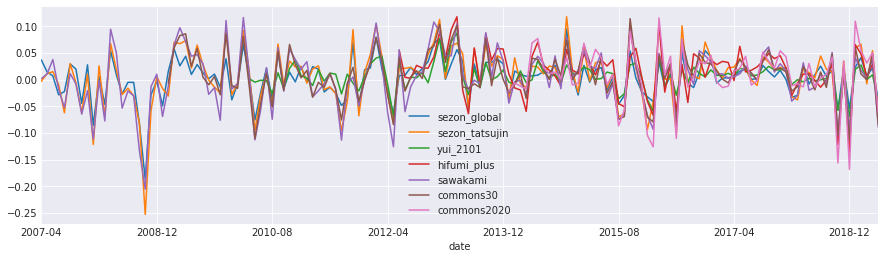

In [6]:
rcParams['figure.figsize'] = 15,4
returns.plot(x='date', y=returns.columns[1:8])

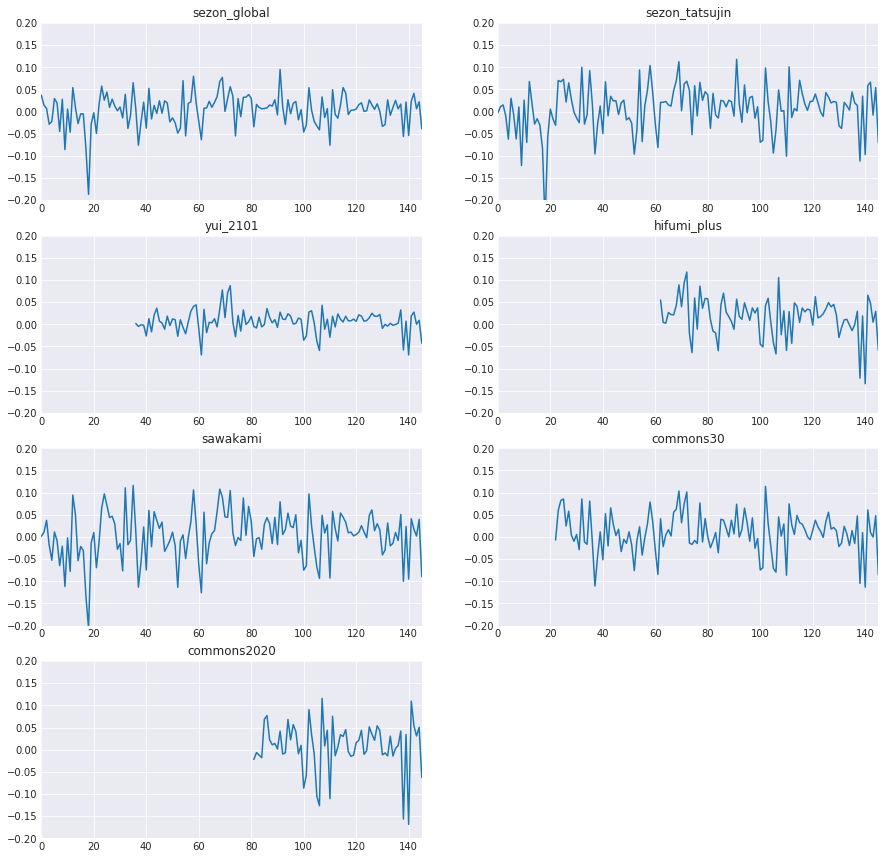

In [7]:
rcParams['figure.figsize'] = 15,15
for i in range(7):
    tmp = 421 + i
    plt.subplot(tmp)
    plt.ylim(-0.2,0.2)
    returns.iloc[:,i+1].plot()
    plt.title(returns.columns[i+1])

In [8]:
returns.mean()

sezon_global      0.003075
sezon_tatsujin    0.006283
yui_2101          0.005950
hifumi_plus       0.016305
sawakami          0.002752
commons30         0.009304
commons2020       0.007545
dtype: float64

/mnt/c/ubuntu_home/anaconda3/envs/my_env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/mnt/c/ubuntu_home/anaconda3/envs/my_env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


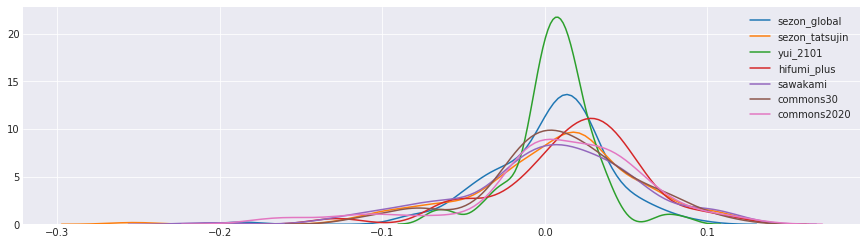

In [9]:
rcParams['figure.figsize'] = 15,4
for i in range(7):
    sns.kdeplot(returns.iloc[:,i+1])

/mnt/c/ubuntu_home/anaconda3/envs/my_env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/mnt/c/ubuntu_home/anaconda3/envs/my_env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


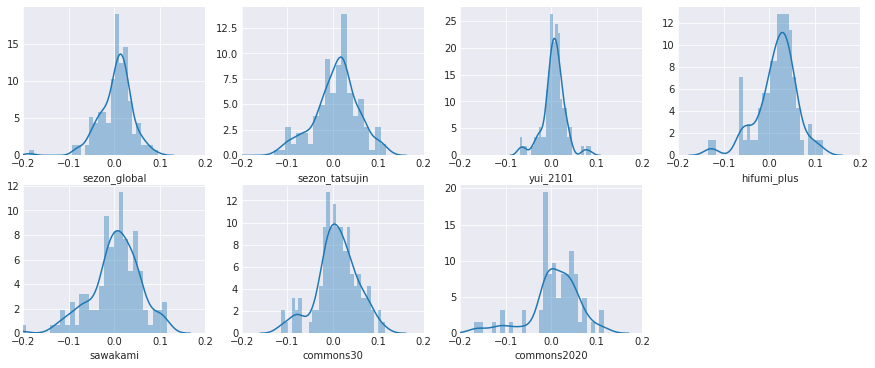

In [10]:
rcParams['figure.figsize'] = 15,6
for i in range(7):
    tmp = 241 + i
    plt.subplot(tmp)
    plt.xlim(-0.2,0.2)
    sns.distplot(returns.iloc[:,i+1], bins=30)

In [11]:
returns.std()

sezon_global      0.037008
sezon_tatsujin    0.052618
yui_2101          0.024919
hifumi_plus       0.044490
sawakami          0.054612
commons30         0.045153
commons2020       0.055567
dtype: float64

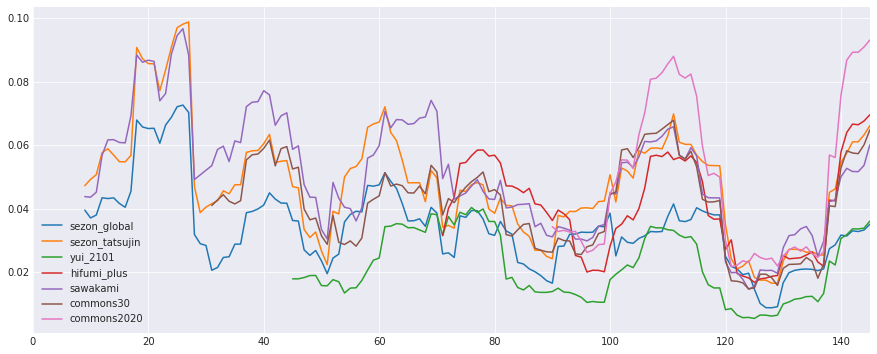

In [12]:
rcParams['figure.figsize'] = 15,6
returns.iloc[:,1:8].rolling(10).std().plot()

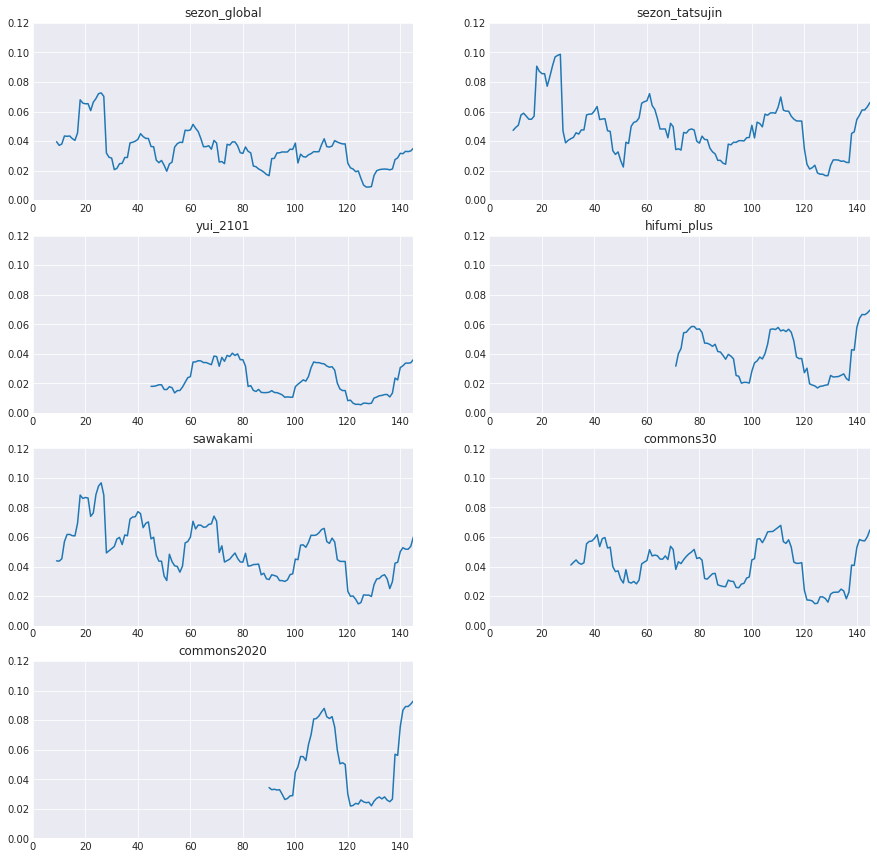

In [13]:
rcParams['figure.figsize'] = 15,15
for i in range(7):
    tmp = 421 + i
    plt.subplot(tmp)
    plt.ylim(0,0.12)
    returns.iloc[:,i+1].rolling(10).std().plot()
    plt.title(returns.columns[i+1])

/mnt/c/ubuntu_home/anaconda3/envs/my_env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/mnt/c/ubuntu_home/anaconda3/envs/my_env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


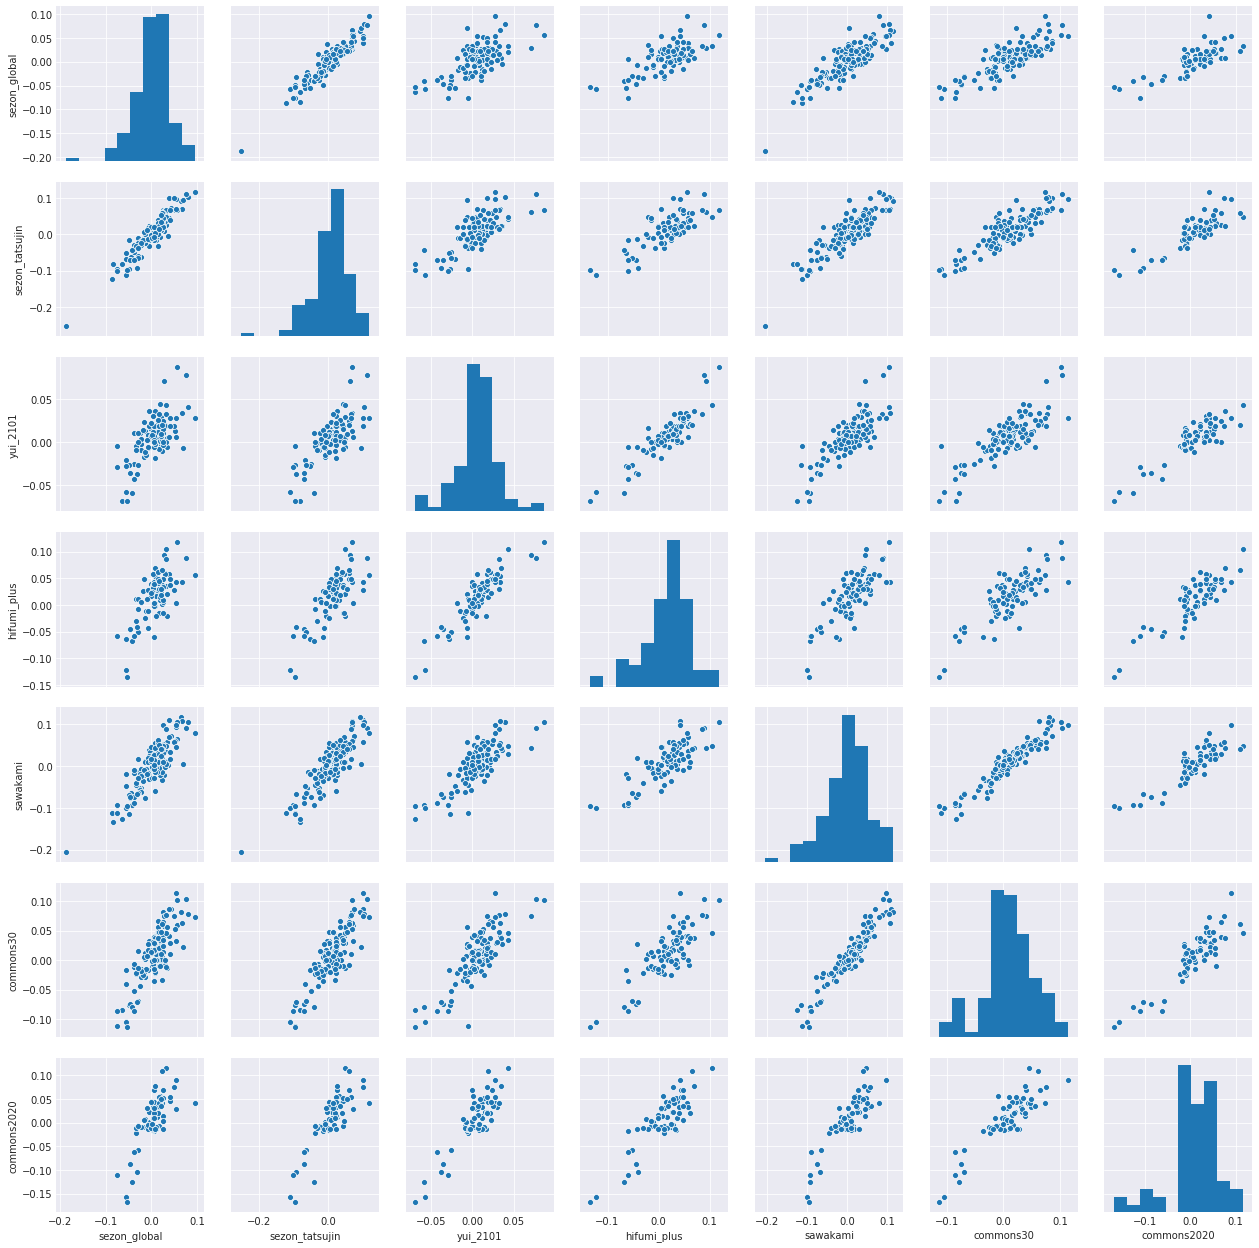

In [14]:
rcParams['figure.figsize'] = 15,10
sns.pairplot(returns.iloc[:,1:8])

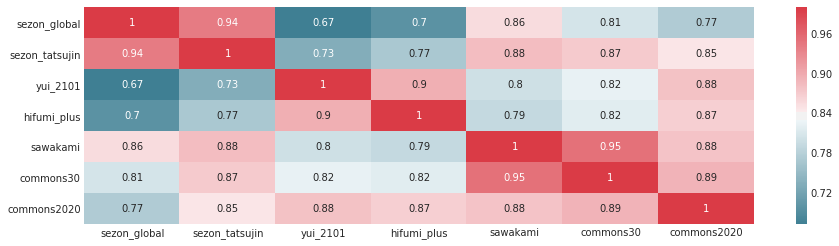

In [15]:
rcParams['figure.figsize'] = 15,4
sns.heatmap(returns.iloc[:,1:].corr(), annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))